## Import packages

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import keras
print("keras      {}".format(keras.__version__))
print("tensorflow {}".format(tf.__version__))

keras      2.3.1
tensorflow 2.5.0


Using TensorFlow backend.


In [3]:
# Allocate a GPU
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

## Load and prepare the images for training

In [4]:
# Load the data stored as the pickle files
pickle_in = open("Data_600px/X_Train_100kHz_01mms_600px.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Data_600px/y_Train_100kHz_01mms_600px.pickle","rb")
y = pickle.load(pickle_in)

# Normalize the pixel values in the images
X = X/255.0

In [5]:
print(f'The shape of X is {X.shape}')

The shape of X is (2800, 600, 600, 1)


In [6]:
# Prepare data for training
X_train = X
y_train = np.array(y)

## CNN Regression Model

In [7]:
# Build the Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1000))
model.add(Dense(400))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(8))
model.add(Dense(2))
model.add(Dense(1, activation=None))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 598, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 65, 65, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 32)        1

## Train and save the model

In [8]:
# Train the model with the parameters specified below
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_split=0.3)

Epoch 1/100
123/123 [==============================] - 8s 41ms/step - loss: 6743.5078 - mean_squared_error: 6743.5078 - val_loss: 1588.3512 - val_mean_squared_error: 1588.3512
Epoch 2/100
123/123 [==============================] - 4s 33ms/step - loss: 1965.7671 - mean_squared_error: 1965.7671 - val_loss: 1930.4453 - val_mean_squared_error: 1930.4453
Epoch 3/100
123/123 [==============================] - 4s 33ms/step - loss: 1631.0734 - mean_squared_error: 1631.0734 - val_loss: 1423.9279 - val_mean_squared_error: 1423.9279
Epoch 4/100
123/123 [==============================] - 4s 33ms/step - loss: 1457.7185 - mean_squared_error: 1457.7185 - val_loss: 1023.3640 - val_mean_squared_error: 1023.3640
Epoch 5/100
123/123 [==============================] - 4s 33ms/step - loss: 1458.1084 - mean_squared_error: 1458.1084 - val_loss: 956.6802 - val_mean_squared_error: 956.6802
Epoch 6/100
123/123 [==============================] - 4s 33ms/step - loss: 1140.2532 - mean_squared_error: 1140.2532 - va

Epoch 97/100
123/123 [==============================] - 4s 33ms/step - loss: 455.8645 - mean_squared_error: 455.8645 - val_loss: 50.4777 - val_mean_squared_error: 50.4777
Epoch 98/100
123/123 [==============================] - 4s 33ms/step - loss: 404.7801 - mean_squared_error: 404.7801 - val_loss: 37.7688 - val_mean_squared_error: 37.7688
Epoch 99/100
123/123 [==============================] - 4s 33ms/step - loss: 436.4151 - mean_squared_error: 436.4151 - val_loss: 59.1982 - val_mean_squared_error: 59.1982
Epoch 100/100
123/123 [==============================] - 4s 33ms/step - loss: 503.0557 - mean_squared_error: 503.0557 - val_loss: 129.6378 - val_mean_squared_error: 129.6378


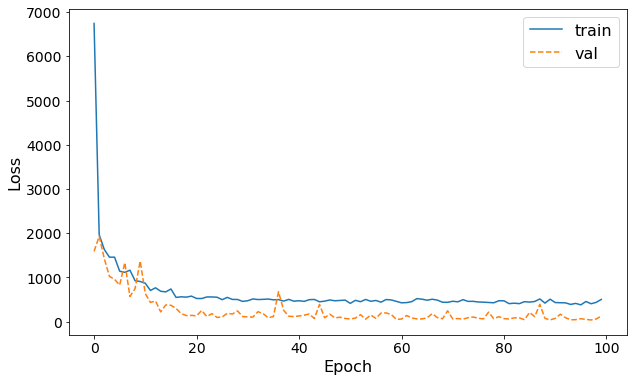

In [9]:
# Plot the model training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], linestyle='dashed',)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(['train', 'val'], loc='upper right', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('regression_model_loss.pdf')
plt.show()

In [10]:
# Save the model
model.save('laser_autofocus_regression.model')

INFO:tensorflow:Assets written to: laser_autofocus_regression.model/assets


## Load and test the model

In [17]:
# Load the model
model = tf.keras.models.load_model('laser_autofocus_regression.model')

In [18]:
# Check the model summary and layer names if needed

# model.summary()
# for ilayer, layer in enumerate(model.layers):
#     print("{:3.0f} {:10}".format(ilayer, layer.name))

In [19]:
# Load the data stored as the pickle files
pickle_in = open("Data_600px/X_Test_100kHz_01mms_600px.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("Data_600px/y_Test_100kHz_01mms_600px.pickle","rb")
y_test = pickle.load(pickle_in)

# Prepare the test data
X_test = X_test/255.0
y_test = np.array(y_test)

# Test the model with testing images
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


19/19 - 0s - loss: 84.4079 - mean_squared_error: 84.4079


## Histogram of the prediction error

In [20]:
# Predicting all test data
ypred = model.predict(X_test)

# compute the difference between the *predicted* and actual focal length
diff = ypred.flatten() - y_test

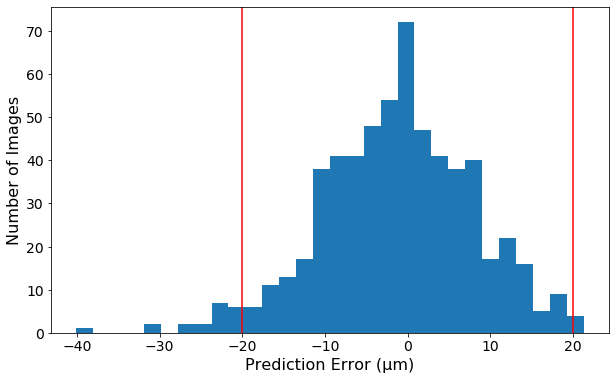

In [21]:
# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(diff, density=False, bins=30)
plt.axvline(x=20, color='red')
plt.axvline(x=-20, color='red')
plt.ylabel('Number of Images', fontsize=16)
plt.xlabel('Prediction Error (µm)', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.savefig('regression_model_prediction_histogram.pdf')
plt.show()

## Histogram of absolute error

96.33 of the images have absolute prediction error less than 20 µm.


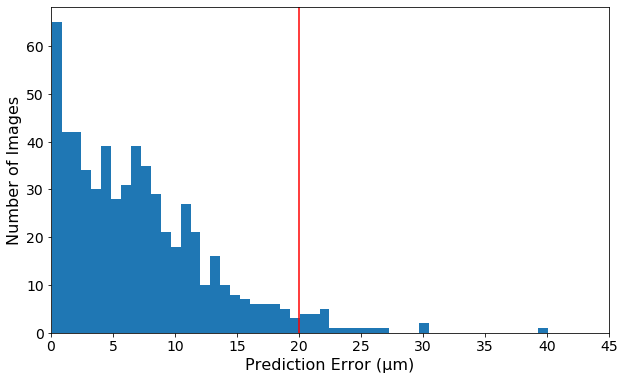

In [22]:
# Predicting all test data
ypred = model.predict(X_test)

# compute the difference between the *predicted* and actual focal length
diff = abs(ypred.flatten() - y_test)

# Percentage of values less than 20
good_val=len(np.where(diff < 20)[0])
total_val = len(diff)
perc = good_val/total_val*100
print(f"{perc:.2f} of the images have absolute prediction error less than 20 µm.")

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(diff, density=False, bins=50)
plt.axvline(x=20, color='red')
plt.ylabel('Number of Images', fontsize=16)
plt.xlabel('Prediction Error (µm)', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([0, 45])
#plt.savefig('regression_model_prediction_absolute_error.pdf')
plt.show()

# End